# <center>Customer Analytics</center>

# 1. Business Understanding
---
## Segmentation data - Legend										
The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 										

<img src="images/1 data dictionary.png"/>

# 2. Data Understanding
---
## Import Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

## Import Data

In [8]:
# Setting ID column as Index
df_segmentation = pd.read_csv("data/segmentation data.csv",index_col="ID")
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


## Explore Data

In [10]:
# Descriptive Statistics of the dataset
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#### `Customer's Age`
* Minimum age is 18 and Maximum age is 76, so the **Range of age** is **58**
* Average age is 36 approx.

#### `Customer's Income (USD)`
* Minimum income is 36,000 approx and Maximum income is 310,000, so the **Range of Income** is **274,000**
* Average income is 121,000


## Correlation Estimate
**is used to learn the relationships among the different variables**
</br>

**Pearson Correlation-default in Python :** `describes Linear Dependency between variables`
* **+1 Correlation :** `indicates Strong Positive Correlation`
* **0 Correlation :** `indicates No Correlation i.e they are Linearly Independent`
* **-1 Correlation :** `indicates Strong Negative Correlation`

In [24]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


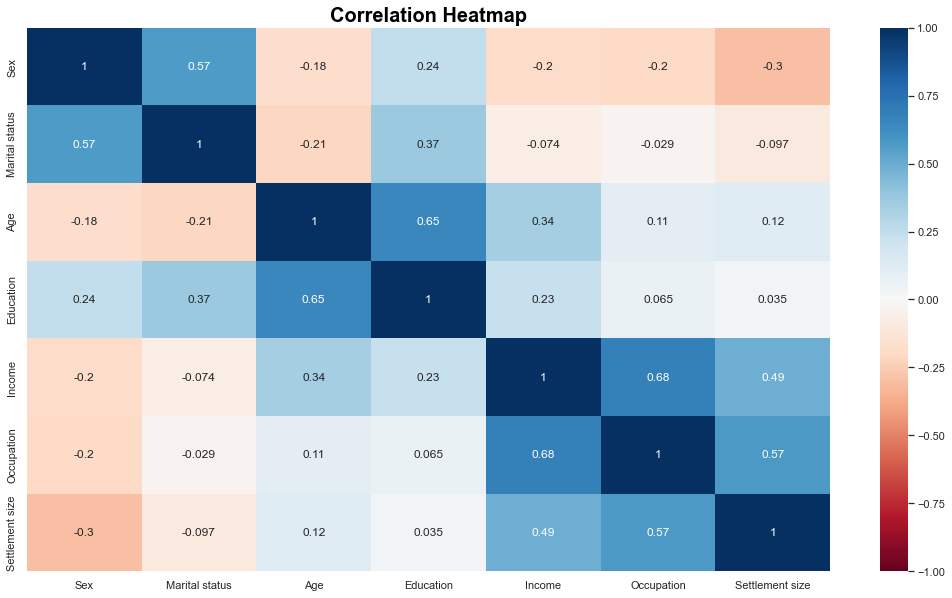

In [43]:
plt.figure(figsize=(18,10))
s = sns.heatmap(df_segmentation.corr(),
               annot=True,
                cmap="RdBu",
                vmax=1,
                vmin=-1
               )
plt.title("Correlation Heatmap", fontdict={'fontsize': 20,
        'fontweight': "bold",
        'color': "black"})
#plt.xticks(rotation=90)
plt.show()

## Visualize Raw Data

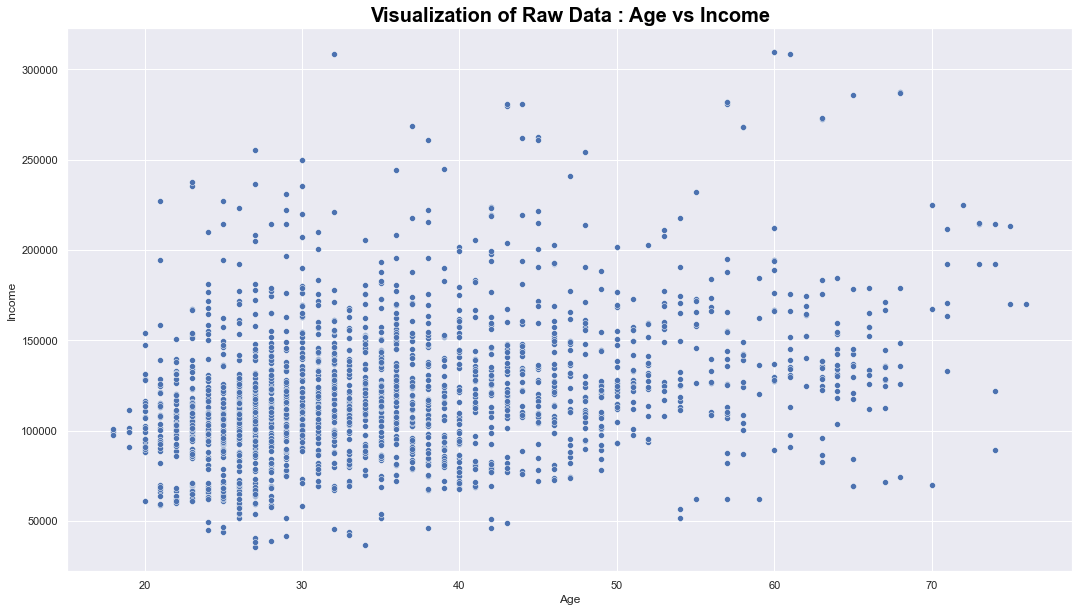

In [48]:
plt.figure(figsize=(18,10))
sns.scatterplot(data= df_segmentation, x = df_segmentation.Age, y = df_segmentation.Income)

plt.title("Visualization of Raw Data : Age vs Income",fontdict={'fontsize': 20,
        'fontweight': "bold",
        'color': "black"})
plt.show()

# 3. Data Preparation
---
## Standardization

In [51]:
scaler = StandardScaler()
df_segmentation_standardized = scaler.fit_transform(df_segmentation)

In [53]:
pd.DataFrame(df_segmentation_standardized)

,0,1,2,3,4,5,6
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


# 4. Modelling
---
## Hierarchical Clustering